Create a bottom

and don't count sand than falls off, just build up until there is one sand at start that can't move
and count the sand grains

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#file_input="input_test.txt"
file_input="input.txt"

In [3]:
with open(file_input,'r') as f:
    file_lines = f.read().split('\n')

In [4]:
file_lines

['521,154 -> 526,154',
 '474,44 -> 474,38 -> 474,44 -> 476,44 -> 476,39 -> 476,44 -> 478,44 -> 478,34 -> 478,44 -> 480,44 -> 480,40 -> 480,44 -> 482,44 -> 482,36 -> 482,44 -> 484,44 -> 484,34 -> 484,44 -> 486,44 -> 486,38 -> 486,44 -> 488,44 -> 488,36 -> 488,44 -> 490,44 -> 490,36 -> 490,44',
 '499,13 -> 499,17 -> 493,17 -> 493,24 -> 507,24 -> 507,17 -> 501,17 -> 501,13',
 '497,80 -> 497,83 -> 489,83 -> 489,87 -> 505,87 -> 505,83 -> 501,83 -> 501,80',
 '471,77 -> 475,77',
 '502,122 -> 502,115 -> 502,122 -> 504,122 -> 504,114 -> 504,122 -> 506,122 -> 506,115 -> 506,122 -> 508,122 -> 508,119 -> 508,122 -> 510,122 -> 510,113 -> 510,122 -> 512,122 -> 512,116 -> 512,122 -> 514,122 -> 514,115 -> 514,122 -> 516,122 -> 516,113 -> 516,122 -> 518,122 -> 518,117 -> 518,122',
 '545,157 -> 545,160 -> 544,160 -> 544,167 -> 556,167 -> 556,160 -> 549,160 -> 549,157',
 '477,73 -> 481,73',
 '532,137 -> 537,137',
 '502,122 -> 502,115 -> 502,122 -> 504,122 -> 504,114 -> 504,122 -> 506,122 -> 506,115 -> 50

Build wall based in instructions

Get max and min coords

In [5]:
ycoords_temp=[]
xcoords_temp=[]

In [6]:
xmin, xmax=0,0
ymin,ymax=0,0

i=0

for line0 in file_lines:
    #Get values
    coords_str = line0.strip('\n').split('->')
    
    for c0 in coords_str:
        coordsxy = c0.split(',')
        if len(coordsxy)==2:
            if coordsxy[0].isnumeric:
                x= int(coordsxy[0])
                y= int(coordsxy[1])
                if i==0:
                    xmin,xmax= x,x
                    ymin, ymax = y,y
                else:
                    xmin=min(x,xmin)
                    xmax=max(x,xmax)
                    ymin=min(y,ymin)
                    ymax=max(y,ymax)
                i+=1

In [7]:
print(xmin,xmax, ymin,ymax)

464 556 13 167


In [8]:
ROCK=1
SAND=2
AIR=0

In [9]:
wall_np = np.zeros((ymax+3 , xmax+ymax)) #AIR
# Recreate wall based in info from file

for line0 in file_lines:
    #Get values
    coords_str = line0.strip('\n').split('->')
    
    i=0 # start of line
    x0,y0 = 0,0

    for c0 in coords_str:
        coordsxy = c0.split(',')
        if len(coordsxy)==2:
            if coordsxy[0].isnumeric:
                x= int(coordsxy[0])
                y= int(coordsxy[1])
                print(f"coords x,y: {x},{y}")
                if i==0:
                    #start of line
                    x0=x
                    y0=y
                else:
                    xmin0=x0
                    xmax0=x
                    if x0>xmax0:
                        #swap values
                        xmin0 = x
                        xmax0 = x0
                    ymin0=y0
                    ymax0=y
                    if y0>ymax0:
                        #swap values
                        ymin0 = y
                        ymax0 = y0
                    
                    #Fill the wall with rock
                    wall_np[ymin0:ymax0+1 , xmin0:xmax0+1]=ROCK
                    x0=x
                    y0=y

                i+=1

#Finally create bottom
wall_np[ymax+2,:]=ROCK

coords x,y: 521,154
coords x,y: 526,154
coords x,y: 474,44
coords x,y: 474,38
coords x,y: 474,44
coords x,y: 476,44
coords x,y: 476,39
coords x,y: 476,44
coords x,y: 478,44
coords x,y: 478,34
coords x,y: 478,44
coords x,y: 480,44
coords x,y: 480,40
coords x,y: 480,44
coords x,y: 482,44
coords x,y: 482,36
coords x,y: 482,44
coords x,y: 484,44
coords x,y: 484,34
coords x,y: 484,44
coords x,y: 486,44
coords x,y: 486,38
coords x,y: 486,44
coords x,y: 488,44
coords x,y: 488,36
coords x,y: 488,44
coords x,y: 490,44
coords x,y: 490,36
coords x,y: 490,44
coords x,y: 499,13
coords x,y: 499,17
coords x,y: 493,17
coords x,y: 493,24
coords x,y: 507,24
coords x,y: 507,17
coords x,y: 501,17
coords x,y: 501,13
coords x,y: 497,80
coords x,y: 497,83
coords x,y: 489,83
coords x,y: 489,87
coords x,y: 505,87
coords x,y: 505,83
coords x,y: 501,83
coords x,y: 501,80
coords x,y: 471,77
coords x,y: 475,77
coords x,y: 502,122
coords x,y: 502,115
coords x,y: 502,122
coords x,y: 504,122
coords x,y: 504,114
coord

(296.0, 724.0)

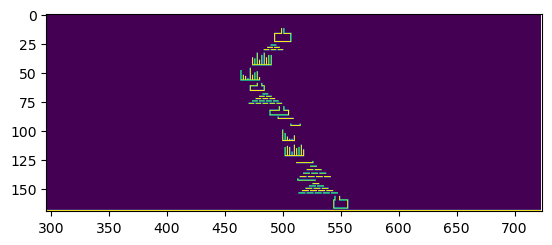

In [10]:
plt.imshow(wall_np)
#plt.ylim(ymin,ymax+1)
plt.xlim(xmin-ymax-1,xmax+ymax+1)

Engine to pour down sand

In [11]:
print(xmin,xmax, ymin,ymax)

464 556 13 167


In [12]:
bcontinue=True #stop only when sand at start cannot move

new_sand_loc=[0,500] #(y,x)
isand=0
count_sand=0

while bcontinue:
    sand_loc = new_sand_loc.copy()

    isand+=1

    #print(f"new sand {i} at (y,x) = {sand_loc}")

    bsandmoving=True
    while bsandmoving:

        #Check next location(s)
        y,x = sand_loc

        #print(f"sand {i} at {sand_loc}")
        
        # if y==ymax+1: #Reversed
        #     #Sand will fall to void, exit
        #     print("Sand will fall to void, exit.")
        #     bcontinue=False
        #     break
        
        #Test new locations
        new_test_locations = [ 
            [y+1,x], #bellow
            [y+1,x-1], #diag left
            [y+1,x+1] # diag right
            ]
        #
        bSandMoved=False

        for t0 in new_test_locations:
            y1, x1 = t0
            #print(f"Check wall_np at {(y1,x1)} = {wall_np[y1,x1]} ")
            if wall_np[y1,x1]==AIR:
                #Set this as new location
                #print(f"Wall at this location is AIR. Move sand here ")
                sand_loc = [y1,x1]
                bSandMoved=True
                break

        if not bSandMoved:
            #Finished testing location and couldn't find where to move
            #Mark it as having stuck sand
            #print(f"Couldn't move sand, stuck here.")
            wall_np[y,x] = SAND

            count_sand+=1
            bsandmoving=False

            if y==0 and x==500:
                #new sand didn't move
                print(f"Sand that can't move is a new grain. Stop here.")
                bcontinue=False
                break



Sand that can't move is a new grain. Stop here.


(296.0, 724.0)

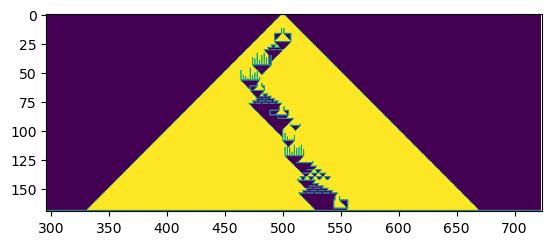

In [13]:
plt.imshow(wall_np)
#plt.ylim(ymin,ymax+1)
plt.xlim(xmin-ymax-1,xmax+ymax+1)

In [14]:
isand

26283

In [15]:
count_sand

26283

OK